In [197]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [198]:
image = cv2.imread('img.png')

In [199]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray =  cv2.GaussianBlur(gray, (5, 5), 0)

In [213]:
scharrx = cv2.Scharr(gray, cv2.CV_64F, 1, 0)
scharry = cv2.Scharr(gray, cv2.CV_64F, 0, 1)

In [222]:
scharr_combined = cv2.magnitude(scharrx, scharry)

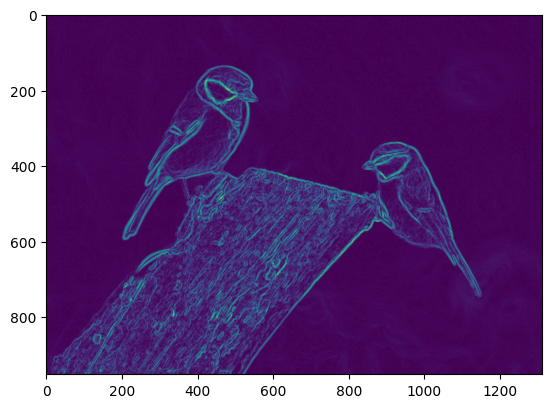

In [223]:
scharr_combined = cv2.normalize(scharr_combined, None, 0, 255, cv2.NORM_MINMAX)
scharr_combined = np.uint8(scharr_combined)

plt.imshow(scharr_combined)

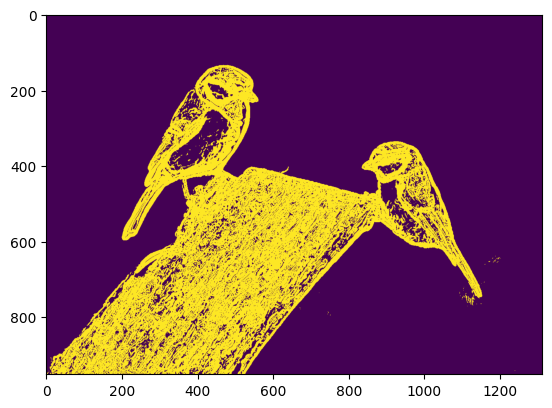

In [412]:

_, mask = cv2.threshold(scharr_combined, 12, 255, cv2.THRESH_BINARY)
plt.imshow(mask)

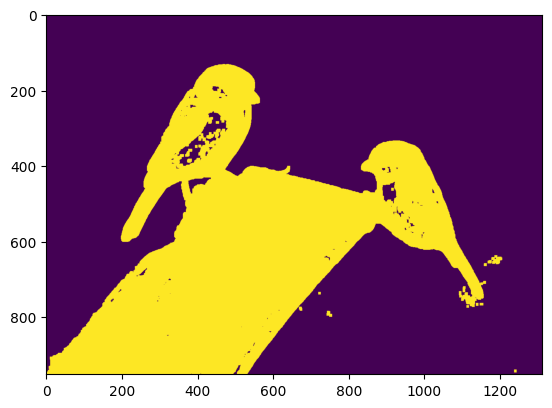

In [413]:
kernel2 = np.ones((4, 4), np.uint8)
mask_dilated = cv2.dilate(mask, kernel2, iterations=2)
plt.imshow(mask_dilated)

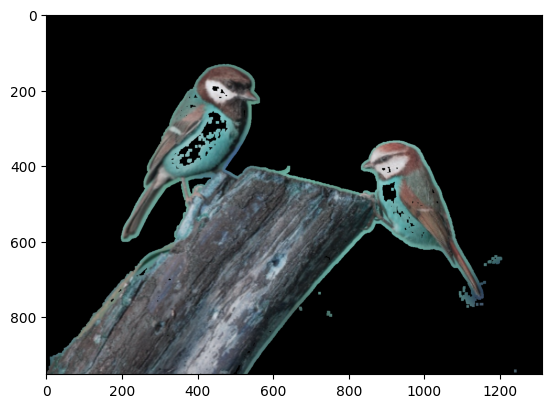

In [414]:
extracted_birds = cv2.bitwise_and(image, image, mask=mask_dilated)
plt.imshow(extracted_birds)

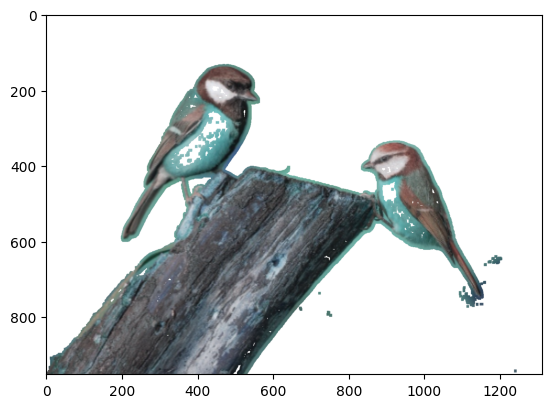

In [415]:
black_pixels = np.all(extracted_birds == [0, 0, 0], axis=2)
extracted_birds[black_pixels] = [255, 255, 255]

plt.imshow(extracted_birds)